In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from tqdm import tqdm

In [2]:
N = 100
x_min = 0
x_max = 1
dx = (x_max-x_min)/N
x = np.linspace(x_min, x_max, N+1)
dt = 0.0001
S = 50000
iappa = 1
multiplier = 1.08
omega_0 = 3*np.pi*np.pi/2
omega = multiplier*omega_0
tau = 0
n = 1

In [3]:
Psi_re = np.sqrt(2)*np.sin(n*np.pi*x)
Psi_im = 0*x

In [4]:

H_re = np.zeros(N+1)
H_re[0] = 0
H_re[N] = 0

for i in range(1, N):
    H_re[i] = -0.5 * ((Psi_re[i+1]+Psi_re[i-1]-2*Psi_re[i]) /
                      (dx*dx))+iappa*(i*dx-0.5)*Psi_re[i]*np.sin(omega*tau)

In [5]:

H_im = np.zeros(N+1)
H_im[0] = 0
H_im[N] = 0

for i in range(1, N):
    H_im[i] = -0.5 * ((Psi_im[i+1]+Psi_im[i-1]-2*Psi_im[i]) /
                      (dx*dx))+iappa*(i*dx-0.5)*Psi_im[i]*np.sin(omega*tau)

In [6]:
norm = []
x_s = []
E = []

Psi_R = Psi_re
Psi_I = Psi_im
H_R = H_re
H_I = H_im

In [14]:

for i in tqdm(range(S)):
    Psi_R = Psi_R + H_I*dt/2
    tau = tau + dt/2

    steps = range(1,N)

    for i in steps:
        H_R[i] = -0.5 * ((Psi_R[i+1] + Psi_R[i-1] - 2*Psi_R[i]) / dx/dx) + \
            kappa * (i*dx - 0.5) * Psi_R[i] * np.sin(omega * tau)
    Psi_I = Psi_I - H_R*dt

    tau = tau + dt/2
    
    for i in steps:
        H_I[i] = -0.5 * ((Psi_I[i+1] + Psi_I[i-1] - 2*Psi_I[i]) / dx/dx) + \
            kappa * (i*dx - 0.5) * Psi_I[i] * np.sin(omega * tau)
    Psi_R = Psi_R + H_I*dt/2

    for i in steps:
        H_R[i] = -0.5 * ((Psi_R[i+1] + Psi_R[i-1] - 2*Psi_R[i]) / dx/dx) + \
            kappa * (i*dx - 0.5) * Psi_R[i] * np.sin(omega * tau)

    norm.append(dx*np.sum(Psi_R*Psi_R + Psi_I*Psi_I))
    x_s.append(dx*np.sum(x*(Psi_R*Psi_R+Psi_I*Psi_I)))
    E.append(dx*np.sum(Psi_R*H_R+Psi_I*H_I))

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:26<00:00, 1880.06it/s]


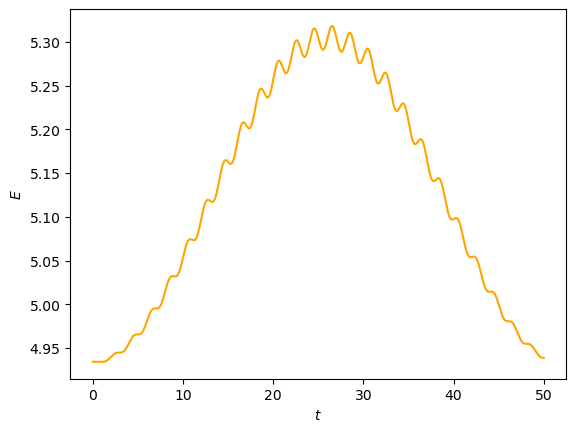

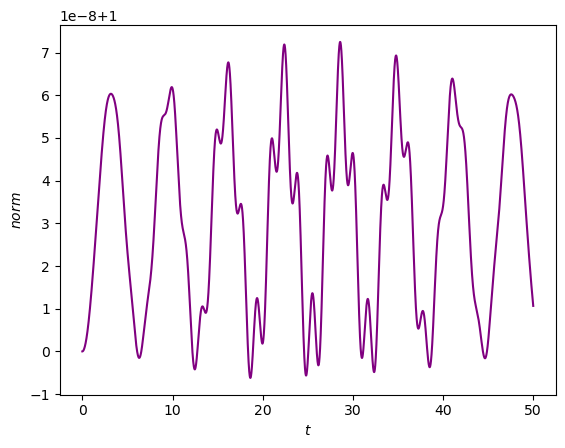

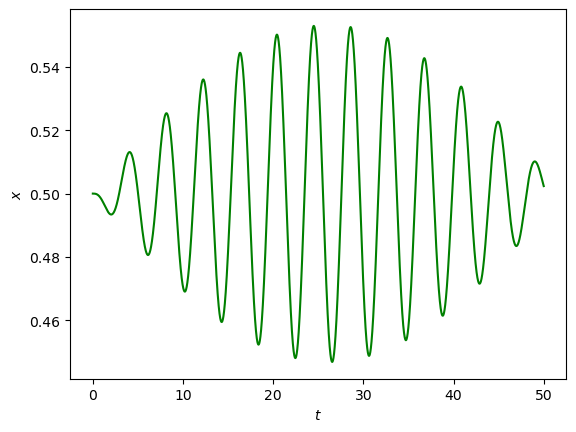

In [11]:
plt.plot(np.linspace(0, 50, S), E, color='orange')
plt.xlabel(r'$t$')
plt.ylabel(r'$E$')
plt.savefig('E_on_t.png')
plt.show()


plt.plot(np.linspace(0, 50, S), norm, color='purple')
plt.xlabel(r'$t$')
plt.ylabel(r'$norm$')
plt.savefig('norm_on_t.png')
plt.show()

plt.plot(np.linspace(0, 50, S), x_s, color='green')
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.savefig('norm_on_t.png')
plt.show()

In [12]:
print(max(E))

5.318097753492359


In [42]:
x = np.array([0.9, 0.92, 0.94, 0.96, 0.98, 1, 1.02, 1.04, 1.07, 1.1])
y = np.array([5.12, 5.24, 5.49, 6.16, 8.98, 19.72, 8.95, 6.26, 5.43, 5.19])

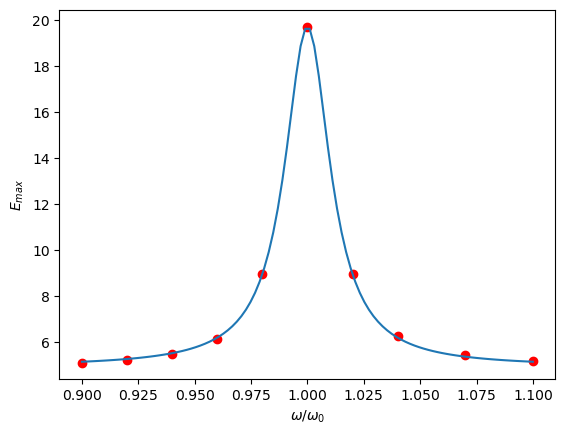

In [47]:
def fit(x, C1, C2, gamma):
    return C1+4*C2*gamma/(4*(x-1)**2+gamma)

params, _ = scipy.optimize.curve_fit(fit, x, y)
C1, C2, gamma = params

x1 = np.linspace(0.9, 1.1, 100)
plt.scatter(x, y, color='red')
plt.plot(x1, fit(x1, C1, C2, gamma))
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$E_{max}$')
plt.savefig('schrodinger_resonance_fit.png')